<style>
html, body, p{
    text-align: justify !important;
    text-justify: inter-word !important;
    font-size:22px !important;
}

.centrado{
    display:flex;
    align-items:center;
    justify-content:center;
    flex-direction:column;
    font-size:30px;
}
</style>

<div class="centrado"><img src="https://estadisticaccbas.uaa.mx/pluginfile.php/2/course/section/1/LOGOBENEMERITA_CIRCULAR.png?time=1606497553373" style="max-width: 508px;"></div>

<div class="centrado">

<b>Alumno</b>

Cristián Israel Donato Flores

292198

8 - A

Ingeniería en Computación Inteligente

Centro de Ciencias Básicas

<b>Tarea</b>

Momentos e Invariantes

31 de Mayo de 2024
</div>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Cargamos y transformamos la imagen

In [3]:
def load_and_transform_image(image_path, angle):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB
    transformed_image = rotate_image(image, angle)
    return image, transformed_image

## Rotamos la imagen

In [4]:
def rotate_image(image, angle):
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

## Gráficamos las imágenes

In [5]:
def plot_images(original, transformed):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Imagen Original')
    plt.imshow(original)
    plt.subplot(1, 2, 2)
    plt.title('Imagen Transformada')
    plt.imshow(transformed)
    plt.show()

## Calculamos la intensidad de cada pixel

In [6]:
def calculate_intensity(image):
    return 0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]

## Guardamos la información en un txt

In [7]:
def save_to_file(filename, data, fmt='%0.2f'):
    np.savetxt(filename, data, fmt=fmt)

## Cargamos y calculamos los momentos en una función

In [8]:
def calculate_and_save_moments(image, filename):
    moments = cv2.moments(image)
    with open(filename, 'w') as file:
        for key, value in moments.items():
            file.write(f'{key}: {value}\n')
    return moments

## Calculamos el centroide

In [9]:
def calculate_centroid(moments):
    cx = moments['m10'] / moments['m00']
    cy = moments['m01'] / moments['m00']
    return (cx, cy)

## Gráficamos las imágenes con los centroides

In [10]:
def plot_images_with_centroids(original, transformed, centroid_original, centroid_transformed):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Imagen Original con Centroid')
    plt.imshow(original)
    plt.scatter([centroid_original[0]], [centroid_original[1]], color='red')

    plt.subplot(1, 2, 2)
    plt.title('Imagen Transformada con Centroid')
    plt.imshow(transformed_image)
    plt.scatter([centroid_transformed[0]], [centroid_transformed[1]], color='red')

    plt.show()

## Calculamos los momentos centrales normalizados

In [11]:
def calculate_normalized_central_moments(moments):
    nu20 = moments['mu20'] / (moments['m00'] ** 2)
    nu02 = moments['mu02'] / (moments['m00'] ** 2)
    nu11 = moments['mu11'] / (moments['m00'] ** 2)
    nu30 = moments['mu30'] / (moments['m00'] ** 2.5)
    nu12 = moments['mu12'] / (moments['m00'] ** 2.5)
    nu21 = moments['mu21'] / (moments['m00'] ** 2.5)
    nu03 = moments['mu03'] / (moments['m00'] ** 2.5)
    return {
        'nu20': nu20, 'nu02': nu02, 'nu11': nu11,
        'nu30': nu30, 'nu12': nu12, 'nu21': nu21, 'nu03': nu03
    }

## Calculamos los momentos Hu

In [12]:
def calculate_hu_moments(moments):
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

## Guardamos los momentos normalizados en un txt

In [13]:
def save_moments_to_file(filename, moments):
    with open(filename, 'w') as file:
        for key, value in moments.items():
            file.write(f'{key}: {value}\n')

## Creamos una tabla comparativa para los momentos centralizados así como para los momentos Hu mediante una función

In [14]:
def create_comparative_table(normalized_original, normalized_transformed, hu_original, hu_transformed):
    data_normalized = {
        'Moment': ['nu20', 'nu02', 'nu11', 'nu30', 'nu12', 'nu21', 'nu03'],
        'Original': [normalized_original[key] for key in normalized_original],
        'Transformed': [normalized_transformed[key] for key in normalized_transformed]
    }

    data_hu = {
        'Moment': [f'Hu{i+1}' for i in range(7)],
        'Original': hu_original,
        'Transformed': hu_transformed
    }

    df_normalized = pd.DataFrame(data_normalized)
    df_hu = pd.DataFrame(data_hu)

    with open('comparative_table_normalized.txt', 'w') as file:
        file.write(df_normalized.to_string(index=False))

    with open('comparative_table_hu.txt', 'w') as file:
        file.write(df_hu.to_string(index=False))

## Cargamos la imagen y la transformamos utlizando la primera función
## Gráficamos ambas imágenes

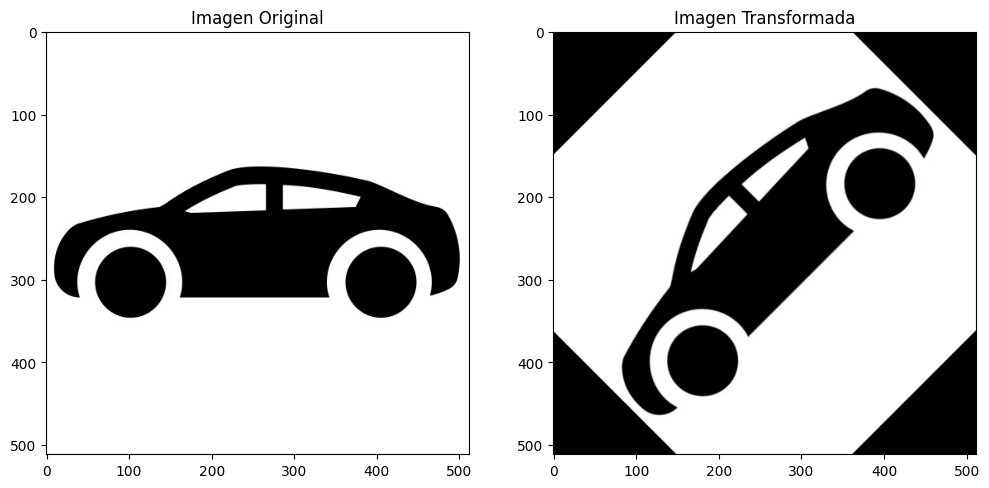

In [15]:
image_path = 'img/car.jpg'
original_image, transformed_image = load_and_transform_image(image_path, 45)

plot_images(original_image, transformed_image)

## Mandamos a llamar la función de intensidad para calcular ambas imágenes
## Guardamos en un txt dicha información de cada imagen

In [16]:
intensity_original = calculate_intensity(original_image)
intensity_transformed = calculate_intensity(transformed_image)

save_to_file('intensity_original.txt', intensity_original)
save_to_file('intensity_transformed.txt', intensity_transformed)

## Calculamos y guardamos los momentos de cada imagen

In [17]:
moments_original = calculate_and_save_moments(intensity_original, 'moments_original.txt')
moments_transformed = calculate_and_save_moments(intensity_transformed, 'moments_transformed.txt')



## Cálculamos el centroíde de cada imagen y lo gráficamos

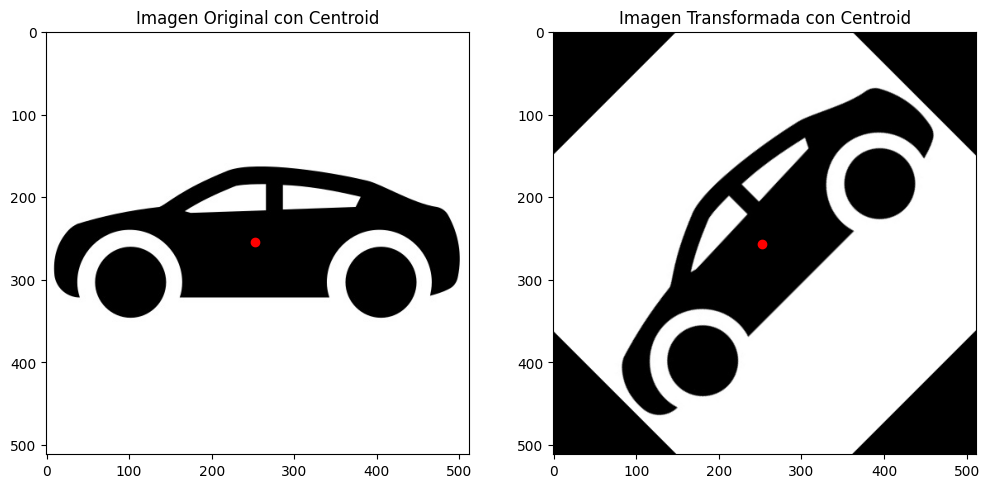

In [18]:
centroid_original = calculate_centroid(moments_original)
centroid_transformed = calculate_centroid(moments_transformed)

plot_images_with_centroids(original_image, transformed_image, centroid_original, centroid_transformed)

## Obtenemos los momentos normalizados de ambas imágenes y guardamos los datos en txt

In [19]:
normalized_moments_original = calculate_normalized_central_moments(moments_original)
normalized_moments_transformed = calculate_normalized_central_moments(moments_transformed)

save_moments_to_file('normalized_moments_original.txt', normalized_moments_original)
save_moments_to_file('normalized_moments_transformed.txt', normalized_moments_transformed)

## Obtenemos los momentos Hu de ambas imágenes y guardamos los datos en txt

In [20]:
hu_moments_original = calculate_hu_moments(moments_original)
hu_moments_transformed = calculate_hu_moments(moments_transformed)

save_to_file('hu_moments_original.txt', hu_moments_original, fmt='%0.5e')
save_to_file('hu_moments_transformed.txt', hu_moments_transformed, fmt='%0.5e')

## Creamos la tabla comparativa de ambas imágenes en sus respectivos momentos

In [21]:
create_comparative_table(normalized_moments_original, normalized_moments_transformed, hu_moments_original, hu_moments_transformed)

## Conclusión
### En esta práctica, usamos Python para transformar una imagen y analizar sus propiedades. Aplicamos una rotación a una imagen y comparamos la versión original con la modificada. 

### Calculamos la intensidad de los píxeles, transformando la imagen a escala de grises, y guardamos estos valores en archivos. También calculamos los momentos geométricos y los momentos de Hu, que nos ayudaron a describir la forma y distribución de la imagen.

### Finalmente, creamos tablas comparativas para ver cómo las transformaciones afectaron la imagen. Esta práctica nos permitió entender mejor cómo las transformaciones y análisis de imágenes pueden ser útiles en diversas aplicaciones, como el reconocimiento de patrones y la visión por computadora.